##### Model Training – Baseline Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [2]:
df=pd.read_csv(r"C:/Users/HP/PCOD-DETECTION/data/processed/Day5-preprocessed.csv")
print(df.columns)

Index(['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)',
       'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)',
       'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)',
       'Waist(inch)', 'Hip(inch)', 'Avg. F size (L) (mm)', 'PCOS (Y/N)'],
      dtype='object')


In [3]:
#prepare features and labels 
#X=features ,y=target
X=df.drop('PCOS (Y/N)',axis=1)
y=df['PCOS (Y/N)']

In [4]:
#split into train/test(80/20)
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
#Why stratify? This ensures the class distribution in train/test is similar — crucial in healthcare datasets

##### Train Baseline Models
##### Logistic Regression

In [5]:
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)

##### Random Forest

In [6]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

##### XGBoost

In [8]:
xgb_model=XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [10]:
#Evaluate Models
def evaluate_model(name,y_test,y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("F1 Score:",f1_score(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))

evaluate_model("Logistic Regression",y_test,y_pred_lr)
evaluate_model("Random Forest",y_test,y_pred_rf)
evaluate_model("XGBoost",y_test,y_pred_xgb)
#While accuracy is informative, F1-score is more reliable in medical data to balance false positives and false negatives.


Model: Logistic Regression
Accuracy: 0.9166666666666666
F1 Score: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.88      0.86      0.87        35

    accuracy                           0.92       108
   macro avg       0.91      0.90      0.90       108
weighted avg       0.92      0.92      0.92       108


Model: Random Forest
Accuracy: 0.8981481481481481
F1 Score: 0.835820895522388
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        73
           1       0.88      0.80      0.84        35

    accuracy                           0.90       108
   macro avg       0.89      0.87      0.88       108
weighted avg       0.90      0.90      0.90       108


Model: XGBoost
Accuracy: 0.8981481481481481
F1 Score: 0.8405797101449275
Classification Report:
               precision    recall  

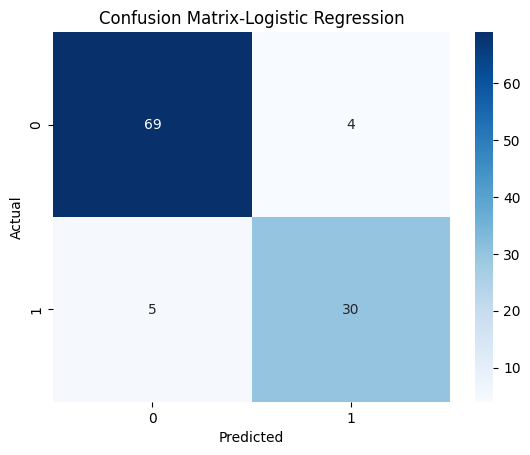

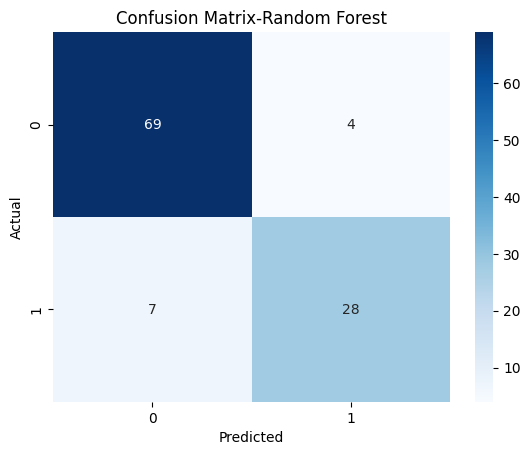

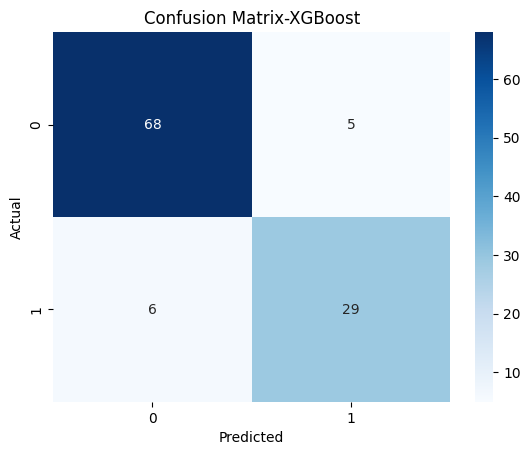

In [11]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test,y_pred,model_name):
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f'Confusion Matrix-{model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test,y_pred_lr,"Logistic Regression")
plot_confusion_matrix(y_test,y_pred_rf,"Random Forest")
plot_confusion_matrix(y_test,y_pred_xgb,"XGBoost")